In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y12=pd.read_csv('C://Users//admin//Documents//git//Final//Iowa_sales//year2012.csv')

In [4]:
y12=y12[y12['City']=='DES MOINES']

In [3]:
y12.columns

Index(['Unnamed: 0', 'Invoice/Item Number', 'Date', 'Store Number',
       'Store Name', 'Address', 'City', 'Zip Code', 'Store Location',
       'County Number', 'County', 'Category', 'Category Name', 'Vendor Number',
       'Vendor Name', 'Item Number', 'Item Description', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'Year'],
      dtype='object')

In [19]:
m12=y12[['Store Number','Vendor Number','Item Number','Volume Sold (Liters)','Item Description','State Bottle Cost','Bottles Sold']]

In [51]:
m12.isna().sum()

Store_Number            0
Vendor_Number           0
Item_Number             0
Volume_Sold_(Liters)    0
Item_Description        0
State_Bottle_Cost       0
Bottles_Sold            0
Total_Cost              0
dtype: int64

In [21]:
m12['State Bottle Cost']=m12['State Bottle Cost'].fillna('$0')

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/637997716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['State Bottle Cost']=m12['State Bottle Cost'].fillna('$0')


In [25]:
m12['State Bottle Cost']=list(map(lambda x: x[1:],m12['State Bottle Cost']))

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/723516209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['State Bottle Cost']=list(map(lambda x: x[1:],m12['State Bottle Cost']))


In [26]:
m12['State Bottle Cost']

11         11.58
31         14.98
36         14.67
55         12.00
84         19.87
           ...  
2082036     7.24
2082038     7.97
2082040     5.49
2082043     7.65
2082051     6.53
Name: State Bottle Cost, Length: 184093, dtype: object

In [27]:
m12['State Bottle Cost']=pd.to_numeric(m12['State Bottle Cost'])

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/1702871614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['State Bottle Cost']=pd.to_numeric(m12['State Bottle Cost'])


In [28]:
m12.dtypes

Store Number              int64
Vendor Number           float64
Item Number               int64
Volume Sold (Liters)    float64
Item Description         object
State Bottle Cost       float64
Bottles Sold              int64
dtype: object

In [29]:
def multi(x,y):
    return x*y

In [30]:
m12['Total Cost']=list(map(multi,m12['State Bottle Cost'],m12['Bottles Sold']))

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/2633298602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Total Cost']=list(map(multi,m12['State Bottle Cost'],m12['Bottles Sold']))


In [ ]:
m12.drop('Item Description',axis=1,inplace=True)

In [33]:
m12.columns=['Store_Number','Vendor_Number','Item_Number','Volume_Sold_(Liters)','Item_Description','State_Bottle_Cost','Bottles_Sold','Total_Cost']

In [50]:
m12.head(2)

,Store_Number,Vendor_Number,Item_Number,Volume_Sold_(Liters),Item_Description,State_Bottle_Cost,Bottles_Sold,Total_Cost
11,2532,192.0,65256,9.0,Jagermeister Liqueur,11.58,12,138.96
31,2633,260.0,5289,12.0,J & B Rare Scotch,14.98,12,179.76


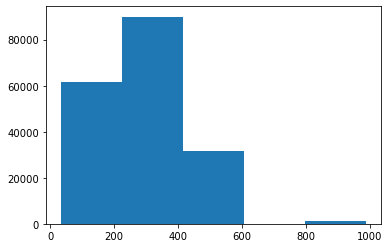

In [42]:
plt.hist(m12.Vendor_Number,bins=5)
plt.show()

# Below is work on aggregating columns, finding appropriate bin #, and reapplying to Datafram

In [59]:
itemnumdf=m12.groupby(['Item_Number']).agg({'State_Bottle_Cost':['mean']})
itemnumdf=itemnumdf.reset_index()
itemnumdf.columns =['Item Number','CPB']
itemnumdf=itemnumdf[itemnumdf['Item Number']!=903056]

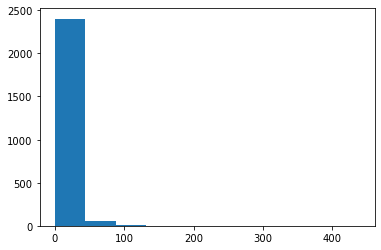

In [61]:
plt.hist(itemnumdf.CPB,bins=10)
plt.show()

In [67]:
m12['Item_Split']=pd.DataFrame(pd.cut(itemnumdf['CPB'],5,labels=['low','medlow','med','medhigh','high']))
m12.head(3)

C:\Users\admin\AppData\Local\Temp/ipykernel_38216/1419615687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Item_Split']=pd.DataFrame(pd.cut(itemnumdf['CPB'],5,labels=['low','medlow','med','medhigh','high']))


,Store_Number,Vendor_Number,Item_Number,Volume_Sold_(Liters),Item_Description,State_Bottle_Cost,Bottles_Sold,Total_Cost,Item_Split
11,2532,192.0,65256,9.0,Jagermeister Liqueur,11.58,12,138.96,low
31,2633,260.0,5289,12.0,J & B Rare Scotch,14.98,12,179.76,low
36,2959,35.0,43038,10.5,Bacardi Gold Rum,14.67,6,88.02,low


In [68]:
vendf=m12.groupby(['Vendor_Number']).agg({'State_Bottle_Cost':['mean']})
vendf=vendf.reset_index()
vendf.columns =['Vendor_Number','CPB']
#vendf=vendf[vendf['Vendor_Number']!=903056]

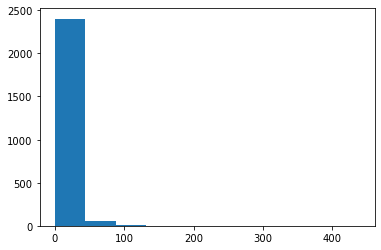

In [69]:
plt.hist(itemnumdf.CPB,bins=10)
plt.show()

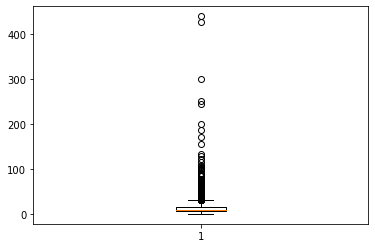

In [71]:
plt.boxplot(itemnumdf.CPB)
plt.show()